In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import SelectFromModel

# Random Forest

In [3]:
df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,21,2,1,1,1,0,45,3,0,106,63,39,28,0.619048,41,39,23,4,34
882,20,2,2,1,0,0,13,3,0,113,67,40,21,0.809524,26,41,17,5,24
883,19,1,1,1,0,0,50,5,0,100,50,31,24,0.547619,14,45,15,8,31
884,24,5,2,1,0,0,20,2,1,120,64,39,21,0.785714,33,58,22,15,19


In [4]:
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
df

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,mbi_ex,mbi_cy,mbi_ea,target
0,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,17,13,20,95
1,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,14,11,26,40
2,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,24,7,23,98
3,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,16,10,21,65
4,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,22,14,23,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,21,2,1,1,1,0,45,3,0,106,63,39,28,0.619048,23,4,34,80
882,20,2,2,1,0,0,13,3,0,113,67,40,21,0.809524,17,5,24,67
883,19,1,1,1,0,0,50,5,0,100,50,31,24,0.547619,15,8,31,59
884,24,5,2,1,0,0,20,2,1,120,64,39,21,0.785714,22,15,19,91


In [5]:
X = df.drop('target', axis=1)
y = df['target']

In [6]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X, y)

RandomForestClassifier()

In [7]:
feature_importances = clf.feature_importances_
feature_importances

array([0.06743157, 0.04899837, 0.02131579, 0.02740376, 0.02607654,
       0.02270777, 0.0847541 , 0.04112611, 0.01806591, 0.08644393,
       0.08491931, 0.08222129, 0.07937052, 0.07824554, 0.07956867,
       0.0732132 , 0.07813761])

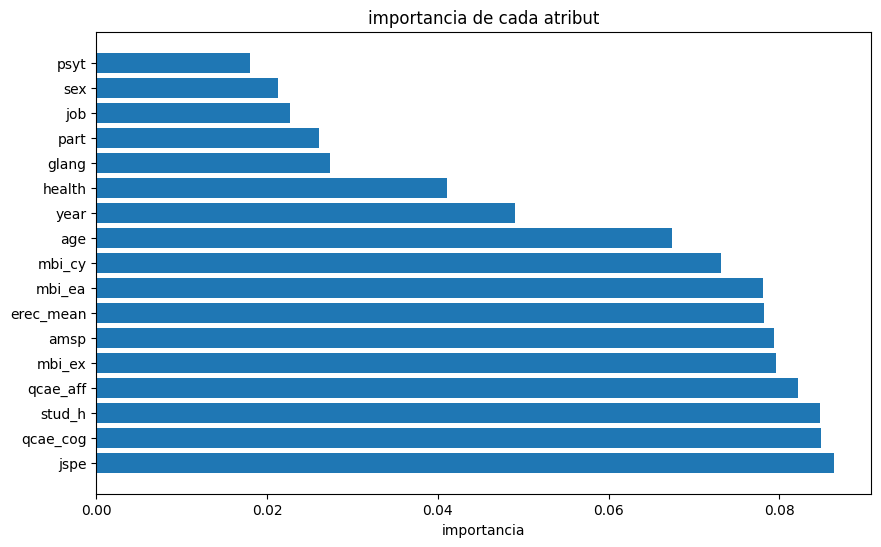

      atribut  importancia
9        jspe     0.086444
10   qcae_cog     0.084919
6      stud_h     0.084754
11   qcae_aff     0.082221
14     mbi_ex     0.079569
12       amsp     0.079371
13  erec_mean     0.078246
16     mbi_ea     0.078138
15     mbi_cy     0.073213
0         age     0.067432
1        year     0.048998
7      health     0.041126
3       glang     0.027404
4        part     0.026077
5         job     0.022708
2         sex     0.021316
8        psyt     0.018066


In [8]:
importance_df = pd.DataFrame({'atribut': X.columns, 'importancia': feature_importances})

importance_df = importance_df.sort_values(by='importancia', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['atribut'], importance_df['importancia'])
plt.xlabel('importancia')
plt.title('importancia de cada atribut')
plt.show()

print(importance_df)

Les caracteristiques amb més importancia son: 'qcae_cog', 'amsp', 'jspe', 'stud_h', 'qcae_aff'. Son les més informatives per el model en termes de predicció de la variable objectiu.

Les caracteristiques menys importants son 'age', 'year', 'health', 'glang', 'part', 'job', 'sex', 'pyst', ja que tenen una contribució menor en comparació a les importants.

# Linear Regression

In [3]:
df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)

In [4]:
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)

In [5]:
X = df.drop('target', axis=1)
y = df['target']

In [6]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [7]:
coefficients = model.coef_

In [8]:
importance_df_linear = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
importance_df_linear = importance_df_linear.sort_values(by='Coefficient', ascending=False)

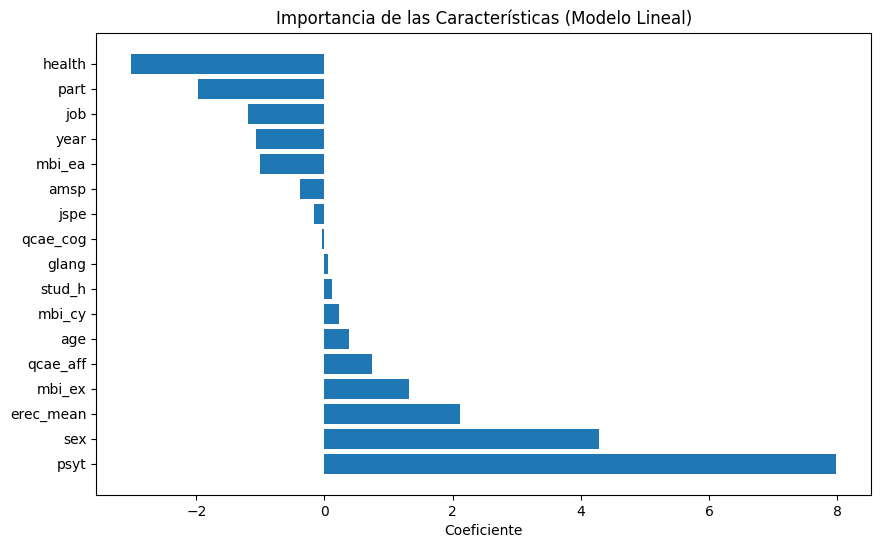

      Feature  Coefficient
8        psyt     7.979258
2         sex     4.281193
13  erec_mean     2.110597
14     mbi_ex     1.319494
11   qcae_aff     0.742631
0         age     0.380706
15     mbi_cy     0.224846
6      stud_h     0.124795
3       glang     0.052498
10   qcae_cog    -0.039671
9        jspe    -0.168637
12       amsp    -0.382934
16     mbi_ea    -1.007413
1        year    -1.074211
5         job    -1.184904
4        part    -1.968074
7      health    -3.010553


In [9]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df_linear['Feature'], importance_df_linear['Coefficient'])
plt.xlabel('Coeficiente')
plt.title('Importancia de las Características (Modelo Lineal)')
plt.show()

print(importance_df_linear)

Les caracteristiques amb coeficients positius indiquen una relació  positiva amb la variable 'target'. Aquestes ara son 'pyst', 'sex', 'mbi_ex', 'erec_mean', 'qcae_aff'.

Aquelles caracteristiques amb coeficient negatiu indiquen una mala relació amb la variable 'target', aquestes son: 'health', 'job', 'part', 'mbi_ea'.

# Comparativa

Veiem que tenim en comú que 'mbi_ex' i 'erec_mean' s'identifiquen com atributs importants. 